In [21]:
import pandas as pd
import numpy as np
# for visaluatztion
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('./sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [22]:
df.shape

(732, 15)

In [23]:
# drop column Unnamed: 0.1
df.drop(columns='Unnamed: 0.1',inplace=True)
# Rename column Unnamed: 0 to id
df.rename(columns={'Unnamed: 0':'Id'},inplace=True)
df.isnull().sum()



Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [24]:
print("Printing the datatypes of all the columns here")
df.dtypes

Printing the datatypes of all the columns here


Id             int64
Text          object
Sentiment     object
Timestamp     object
User          object
Platform      object
Hashtags      object
Retweets     float64
Likes        float64
Country       object
Year           int64
Month          int64
Day            int64
Hour           int64
dtype: object

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [26]:
df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()

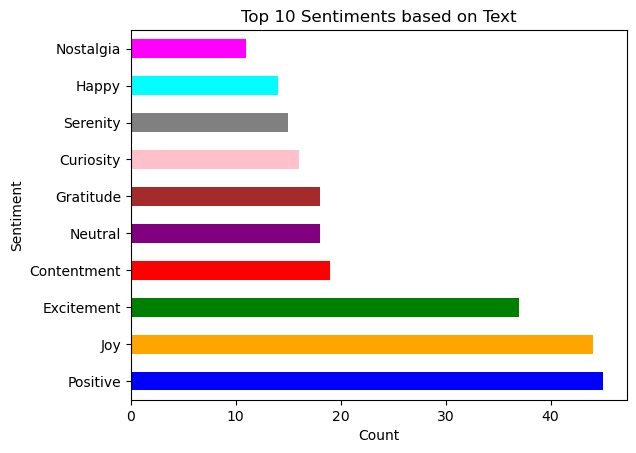

In [46]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='barh', color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta'])
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.show()



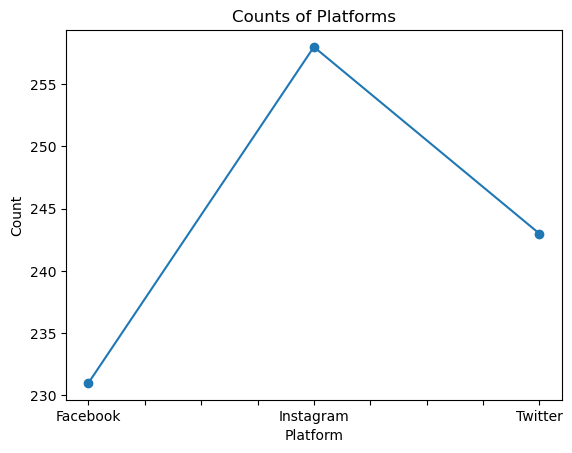

In [31]:
df['Platform'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Counts of Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()



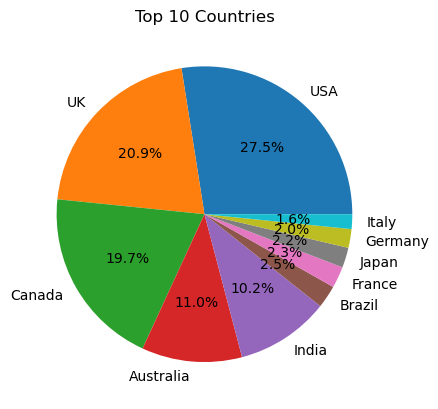

In [32]:
df['Country'].value_counts().nlargest(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Countries')
plt.ylabel('')  # Remove the label on the y-axis for clarity
plt.show()


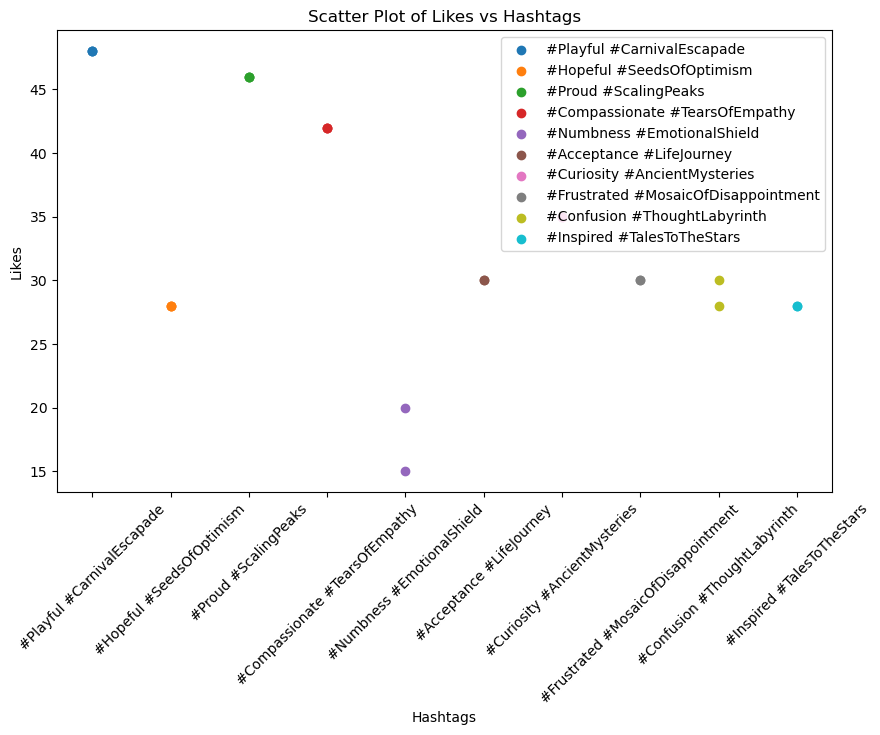

In [39]:
import numpy as np

# Assuming you have a DataFrame df with 'Hashtags' and 'Likes' columns
# Get the top 10 hashtags
top_hashtags = df['Hashtags'].value_counts().nlargest(10).index

# Filter DataFrame for top hashtags
top_hashtags_data = df[df['Hashtags'].isin(top_hashtags)]

# Define a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(top_hashtags)))

# Plot a scatter plot
plt.figure(figsize=(10, 6))  # Set figure size
for i, hashtag in enumerate(top_hashtags):
    hashtag_data = top_hashtags_data[top_hashtags_data['Hashtags'] == hashtag]
    plt.scatter(hashtag_data['Hashtags'], hashtag_data['Likes'], color=colors[i], label=hashtag)

plt.title('Scatter Plot of Likes vs Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Likes')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()


In [40]:
# Descrip data nurimucal
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [41]:
numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


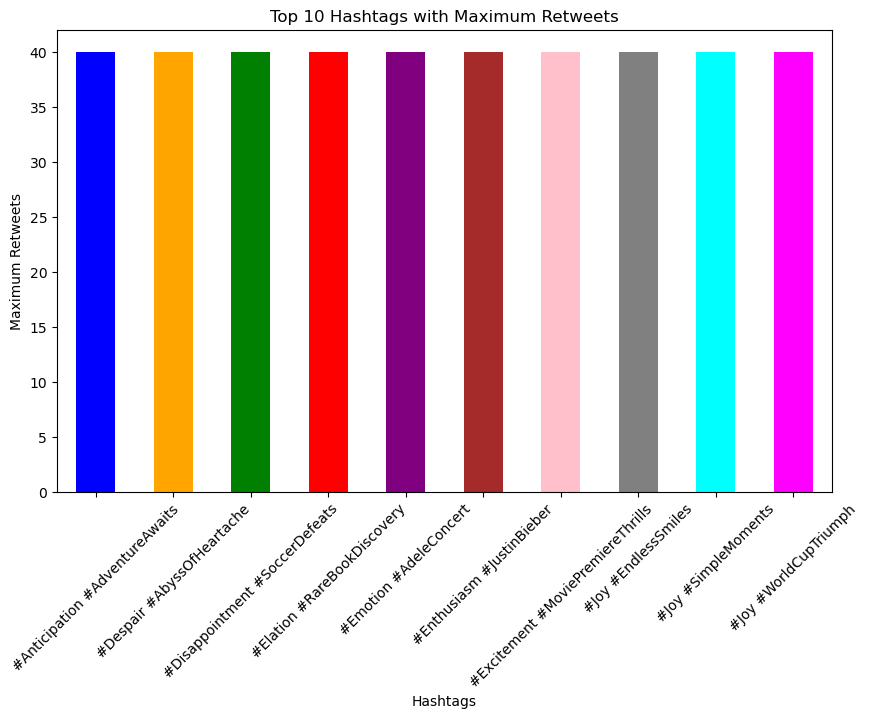

In [43]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
top_hashtags_retweets = df.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)

# Define colors for bars
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot bar chart with different colors
plt.figure(figsize=(10, 6))
top_hashtags_retweets.plot(kind='bar', color=colors)
plt.title('Top 10 Hashtags with Maximum Retweets')
plt.xlabel('Hashtags')
plt.ylabel('Maximum Retweets')
plt.xticks(rotation=45)
plt.show()


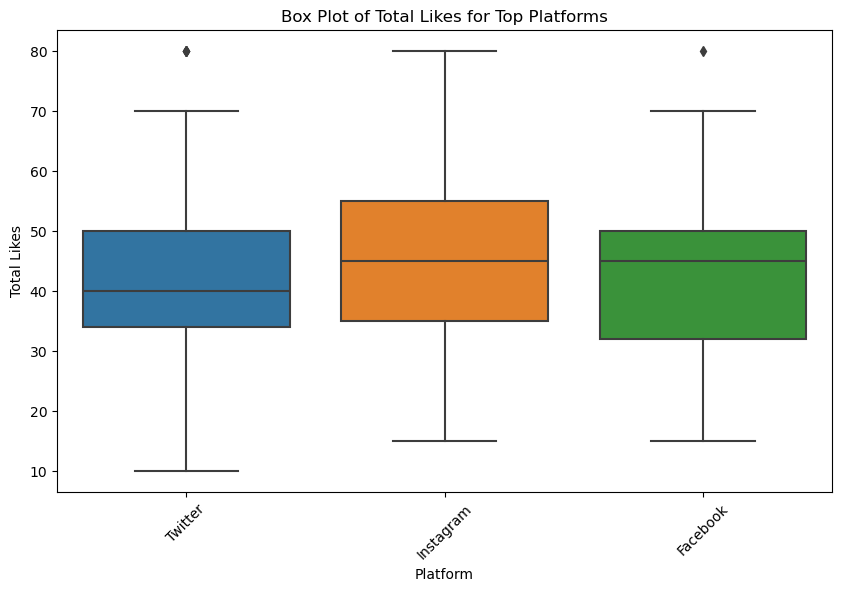

In [44]:
import seaborn as sns

# Assuming df is your DataFrame
top_likes_platform = df.groupby('Platform')['Likes'].sum().nlargest(10)
top_platforms_data = df[df['Platform'].isin(top_likes_platform.index)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_platforms_data, x='Platform', y='Likes')
plt.title('Box Plot of Total Likes for Top Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.show()
import seaborn as sns

# Assuming df is your DataFrame and it has a 'Date' column indicating time
heatmap_data = df.pivot_table(index='Country', columns='Date', values='Likes', aggfunc='sum').fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Total Likes by Country over Time')
plt.xlabel('Date')
plt.ylabel('Country')
plt.show()


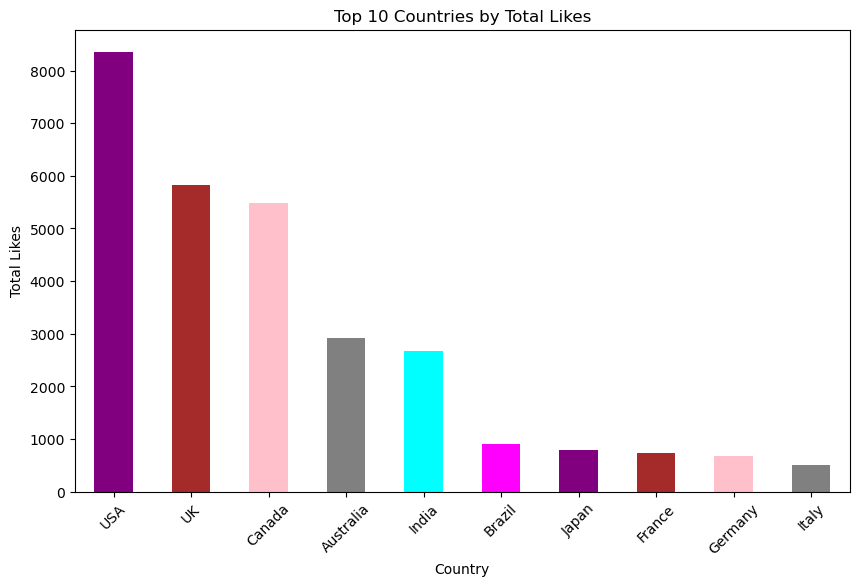

In [51]:
# Assuming df is your DataFrame
top_country_likes = df.groupby('Country')['Likes'].sum().nlargest(10)

# Define colors for bars
colors = ['purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plot bar chart with different colors
plt.figure(figsize=(10, 6))
top_country_likes.plot(kind='bar', color=colors)
plt.title('Top 10 Countries by Total Likes')
plt.xlabel('Country')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.show()


In [49]:
Facebook=df[df['Platform']=='Facebook']
Twitter=df[df['Platform']=='Twitter']
Instagram=df[df['Platform']=='Instagram']

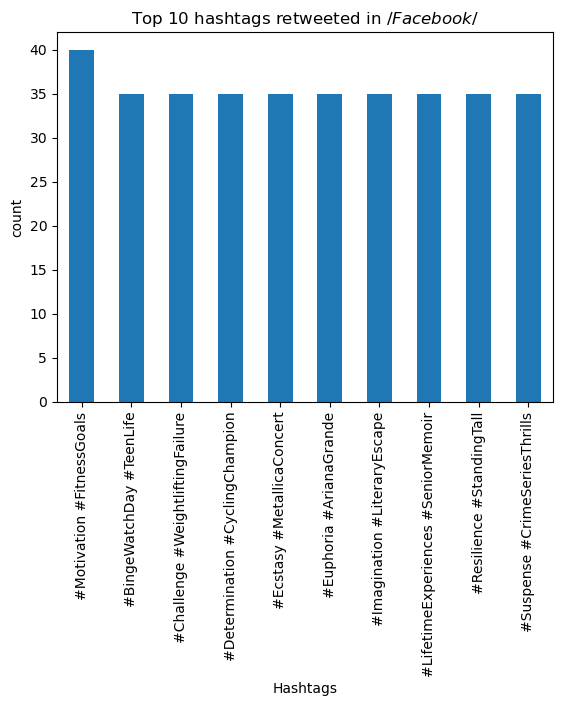

In [50]:
H_R_f=Facebook.groupby('Hashtags')['Retweets'].max().nlargest(10).sort_values(ascending=False)
H_R_f.plot(kind='bar')
plt.title('Top 10 hashtags retweeted in $/ Facebook $/')
plt.xlabel('Hashtags')
plt.ylabel('count')
plt.show()

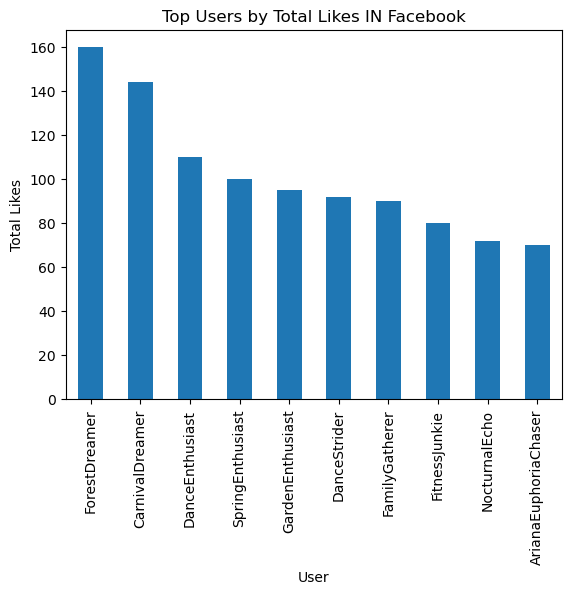

In [52]:
top_likes_platform_F = Facebook.groupby('User')['Likes'].sum().nlargest(10)
top_likes_platform_F.plot(kind='bar')
plt.title('Top Users by Total Likes IN Facebook')
plt.xlabel('User')
plt.ylabel('Total Likes')
plt.show()

F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


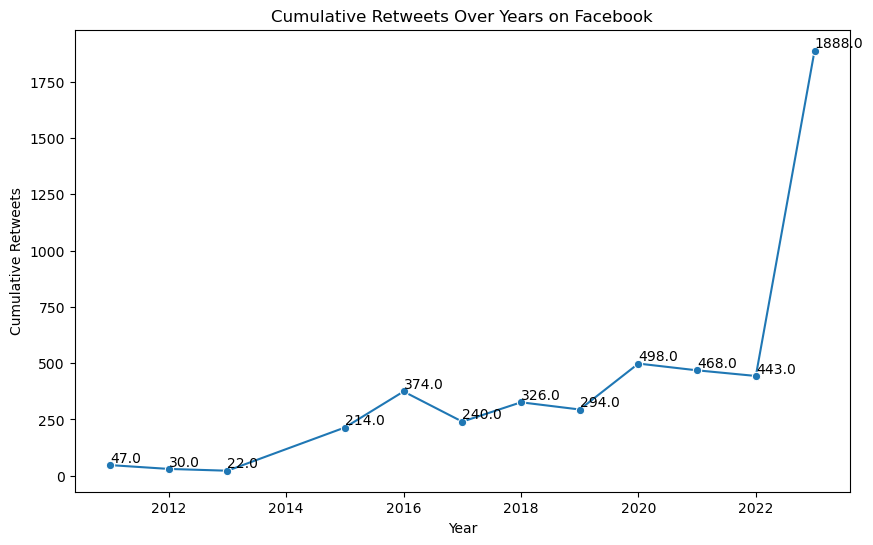

In [53]:
f = Facebook.groupby('Year')['Retweets'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=f, x='Year', y='Retweets', marker='o')
for index, value in f.iterrows():
    plt.text(value['Year'], value['Retweets'], str(value['Retweets']), ha='left', va='bottom')

plt.title('Cumulative Retweets Over Years on Facebook')
plt.xlabel('Year')
plt.ylabel('Cumulative Retweets')

plt.show()

In [ ]:
#last three graphs can be generated for Twitter and instagram as well, just have to use Twitter.groupby and instagram.groupby and so on